## EVALUATION OF ADAPTIVE LEARNING RATE AND MOMENTUM PERFORMANCE
### DOG PROJECT - GIRARDI, RODIO

In [128]:
#IMPORT LIBRARIES
%matplotlib inline
import numpy as np
import random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Data generation

Modelling of a linear regression problem. <br>
Creation of our dataset: <br>
1) Straight line $y = ax + b$ <br>
2) Add some gaussian noise $y = ax + b + noise, \quad$ where $noise \in N(0, \sigma^2)$

In [129]:
# a and b are the true values of the parameters of the line
a = 4
b = 18
sigma = 0.5

# creation of 40/0.05 = 800 data points
x = np.arange(-20, 20, 0.05)    
y = a * x + b + sigma * np.random.randn(x.shape[0])

Text(0.5, 1.0, 'Dataset')

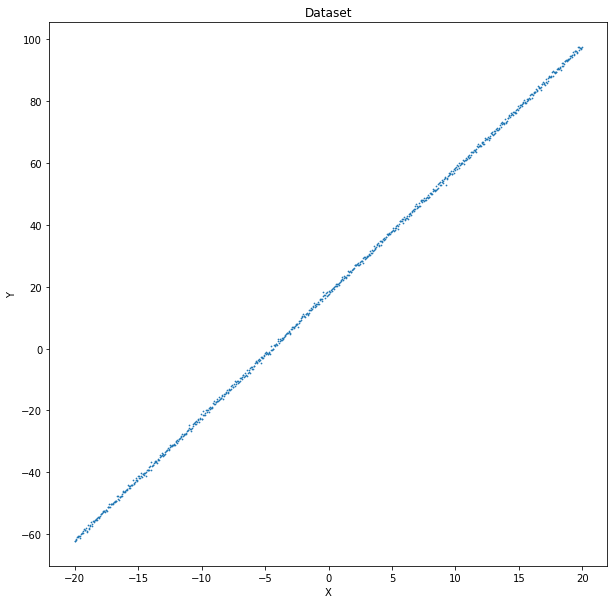

In [130]:
plt.figure(figsize = [10,10])
plt.scatter(x, y, marker='o', s=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset')

The goal of our ML problem is to minimize the loss function (mean squared error) over the parameter vector $\omega=(a,b)$:
$$
F(\omega) = \frac{1}{n}\sum_{i=1}^n(y_i - (a x_i + b) )^2
$$

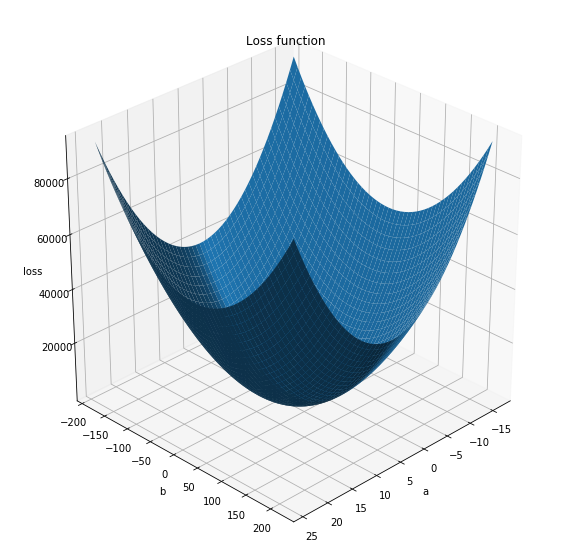

In [145]:
#PLOT OF THE LOSS FUNCTION: check that it is strongly convex

def compute_loss(a_estimate, b_estimate):
    return np.mean(np.square(y - (a_estimate * x + b_estimate)),2)

def plot_loss_function():
    
    # Plot of the loss function
    a_range = 20
    a_stepsize = 0.1
    b_range = 200
    b_stepsize = 1

    a_estimate_range = np.arange(a - a_range, a + a_range, a_stepsize)
    b_estimate_range = np.arange(b - b_range, b + b_range, b_stepsize)
    bgrid, agrid = np.meshgrid(b_estimate_range, a_estimate_range)


    size_x = np.int(a_range / a_stepsize * 2)
    size_y = np.int(b_range / b_stepsize * 2)
    agrid_tiled = np.tile(np.reshape(agrid, [size_x, size_y, 1]), [1,1,x.shape[0]])
    bgrid_tiled = np.tile(np.reshape(bgrid, [size_x, size_y,1]), [1,1,x.shape[0]])
    loss_full_grid = compute_loss(agrid_tiled, bgrid_tiled)

    fig = plt.figure(figsize = [10,10])
    ax = fig.add_subplot(111, projection = '3d')
    ax.view_init(elev = 30, azim = 45)
    ax.plot_surface(agrid, bgrid, loss_full_grid)
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_zlabel('loss')
    ax.set_title('Loss function')
    
plot_loss_function()

## Gradient computation

In [131]:
def gradient(x, y, parameter_vector):
    a,b = parameter_vector[0], parameter_vector[1]
    loss_function = a * x + b - y
    sq_loss_function = (loss_function * loss_function)
    grad_a = (1/len(x)) * (sum(2*np.ones(len(x))*(x * loss_function)))
    grad_b = (1/len(x)) * (sum((2*np.ones(len(x))) * loss_function))
    avg_loss_function = (1/len(x)) * (sum(sq_loss_function))
    return np.array([grad_a, grad_b]), avg_loss_function

In [153]:
# FUNCTION DEFINITION COMMON TO ALL ALGORITHMS

def init_data_store(num_epochs):
    abvalue_store = np.zeros([num_epochs, 2], dtype=float)
    loss_store = np.zeros([num_epochs, 1], dtype=float)    
    return abvalue_store, loss_store

def extract_random_batch(x,y,batch_size): 
    np.arange(len(x))
    sampling = random.choices(np.arange(len(x)), k=batch_size)
    return x[sampling], y[sampling]

def plot_results(abvalue_store, loss_store, title):
    plt.figure(figsize = [18, 5])
    plt.suptitle(title,fontweight="bold")
    plt.subplot(131)
    plt.plot(abvalue_store[:,0])
    plt.title('Convergence of the parameter "a"')
    plt.xlabel("# Epochs")
    plt.ylabel('a')
    plt.subplot(132)
    plt.plot(abvalue_store[:,1])
    plt.title('Convergence of the parameter "b"')
    plt.xlabel("# Epochs")
    plt.ylabel('b')
    plt.subplot(133)
    plt.plot(loss_store)
    plt.title("Loss function")
    plt.xlabel("# Epochs")
    plt.ylabel('loss')

## Full Batch Gradient Descent

Step: $\omega_{k+1} = \omega_{k} - \alpha_{k} \cdot \nabla F(\omega_{k}) = \omega_{k} - \alpha_{k} \cdot \frac{1}{n} \sum_{i=1}^{n} \nabla f(\omega_{k},i)$ <br>  
Pro: Proof of convergence <br>
Cons: computational expensive (compute n gradients) <br>

CPU times: user 585 ms, sys: 3.44 ms, total: 589 ms
Wall time: 593 ms


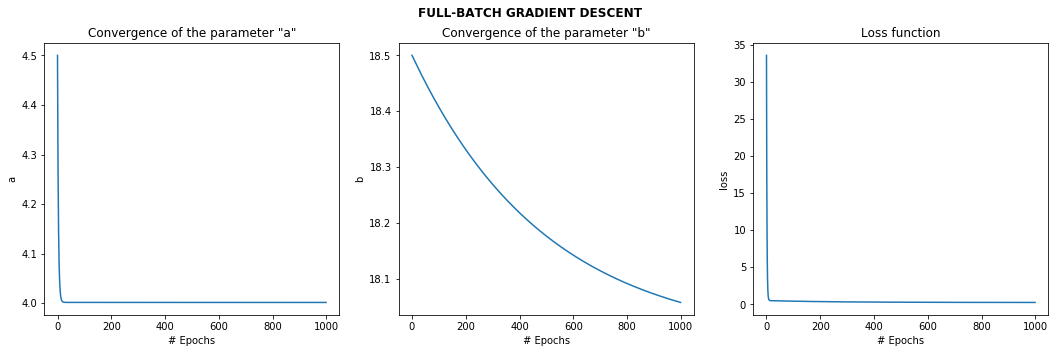

In [163]:
%%time
# Batch gradient descent

initial_a = 4.5
initial_b = 18.5
num_epochs = 1000
learning_rate = 1e-3

abvalue_store, loss_store = init_data_store(num_epochs)

parameter_vector = np.array([initial_a, initial_b])

for i in range(num_epochs):
    abvalue_store[i,:] = parameter_vector
    #gradient computation
    grad, loss = gradient(x,y, parameter_vector)
    
    #update step
    grad_parameter_vector = learning_rate * grad
    parameter_vector = parameter_vector - grad_parameter_vector

    #store the loss function values to plot
    loss_store[i] = loss
    
plot_results(abvalue_store, loss_store, "FULL-BATCH GRADIENT DESCENT")

## Mini Batch gradient descent

Step: $ \omega_{k+1} = \omega_{k} - \alpha_{k} \cdot \frac{1}{m} \sum_{i=1}^{m} \nabla f(\omega_{k},i) $, $m<<n$ <br>  
Pro: less computational expensive (compute m gradients, m<<n) <br>
Cons: noisy convergence <br>

CPU times: user 347 ms, sys: 0 ns, total: 347 ms
Wall time: 347 ms


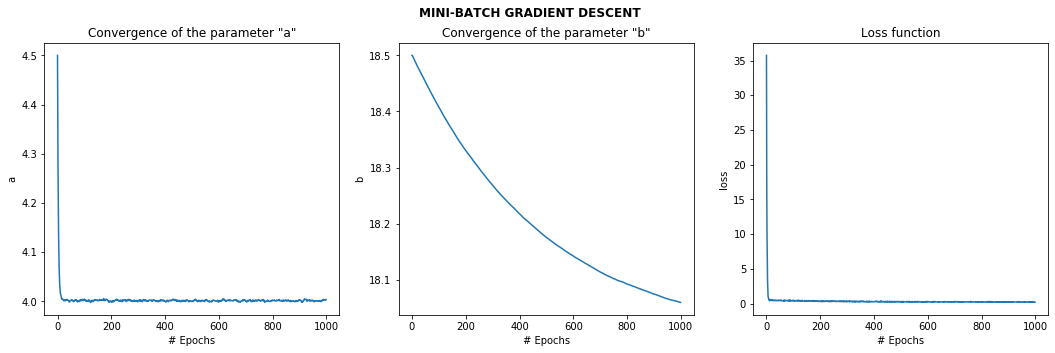

In [164]:
%%time
# Mini batch gradient descent

initial_a = 4.5
initial_b = 18.5
num_epochs = 1000
learning_rate = 1e-3
batch_size = 200

abvalue_store, loss_store = init_data_store(num_epochs)
parameter_vector = np.array([initial_a, initial_b])

for i in range(num_epochs):
    abvalue_store[i,:] = parameter_vector
    
    #gradient computation
    x_batch, y_batch = extract_random_batch(x,y,batch_size)
    grad, loss = gradient(x_batch,y_batch, parameter_vector)
    
    #update step
    grad_parameter_vector = learning_rate * grad
    parameter_vector = parameter_vector - grad_parameter_vector

    #store the loss function values to plot
    loss_store[i] = loss
    

plot_results(abvalue_store, loss_store, "MINI-BATCH GRADIENT DESCENT")

## Stochastic Gradient Descent

CPU times: user 115 ms, sys: 115 µs, total: 115 ms
Wall time: 115 ms


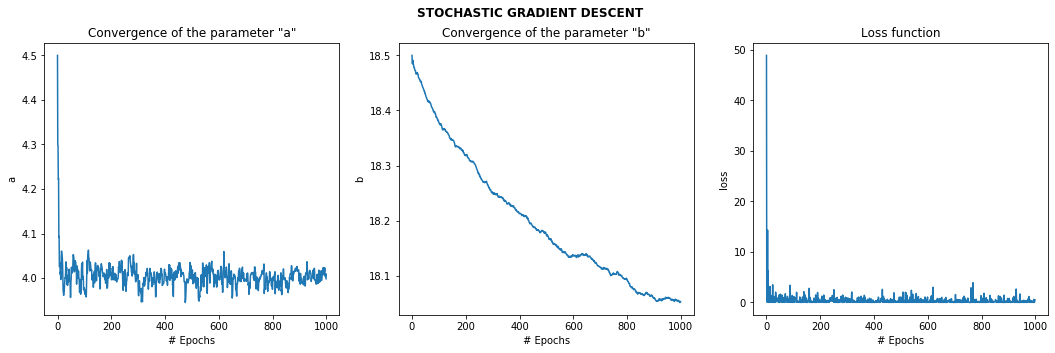

In [157]:
%%time
# Stochastic gradient descent

initial_a = 4.5
initial_b = 18.5
num_epochs = 1000
learning_rate = 1e-3
batch_size = 1

abvalue_store, loss_store = init_data_store(num_epochs)
parameter_vector = np.array([initial_a, initial_b])

for i in range(num_epochs):
    abvalue_store[i,:] = parameter_vector
    
    #gradient computation
    x_batch, y_batch = extract_random_batch(x,y,batch_size)
    grad, loss = gradient(x_batch,y_batch, parameter_vector)
    
    #update step
    grad_parameter_vector = learning_rate * grad
    parameter_vector = parameter_vector - grad_parameter_vector

    #store the loss function values to plot
    loss_store[i] = loss
    

plot_results(abvalue_store, loss_store, "STOCHASTIC GRADIENT DESCENT")

## Momentum

Step: $ \omega_{k+1} = \omega_{k} - \alpha_{k} \cdot \frac{1}{m} \sum_{i=1}^{m} \nabla f(\omega_{k},i) + \beta_{k} (\omega_{k} - \omega_{k-1}) $ <br>
Pro: faster convergence <br>


CPU times: user 358 ms, sys: 0 ns, total: 358 ms
Wall time: 359 ms


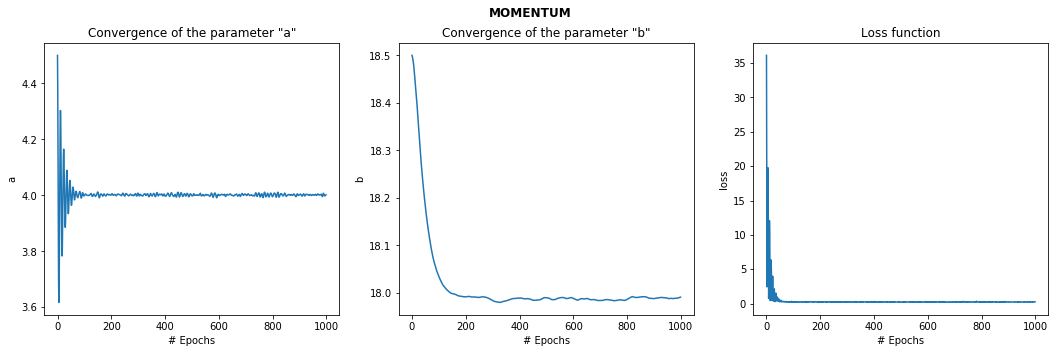

In [158]:
%%time
initial_a = 4.5
initial_b = 18.5
num_epochs = 1000
learning_rate = 1e-3
batch_size = 200 
beta = 0.9

abvalue_store, loss_store = init_data_store(num_epochs)
parameter_vector = np.array([initial_a, initial_b])
velocity = np.array([0, 0])

for i in range(num_epochs):
    abvalue_store[i,:] = parameter_vector
    
    #gradient computation
    x_batch, y_batch = extract_random_batch(x,y,batch_size)
    grad, loss = gradient(x_batch,y_batch, parameter_vector)
    
    #update step
    velocity = beta * velocity - learning_rate * grad
    parameter_vector = parameter_vector + velocity

    #store the loss function values to plot
    loss_store[i] = loss
    

plot_results(abvalue_store, loss_store, "MOMENTUM")

## Nesterov Momentum

Step: $ \omega_{k+1} = \omega_{k} - \alpha_{k} \cdot \frac{1}{m} \sum_{i=1}^{m} \nabla f(\omega_{k} + \beta_{k} (\omega_{k} - \omega_{k-1}),i) + \beta_{k} (\omega_{k} - \omega_{k-1}) $ <br>

CPU times: user 358 ms, sys: 0 ns, total: 358 ms
Wall time: 358 ms


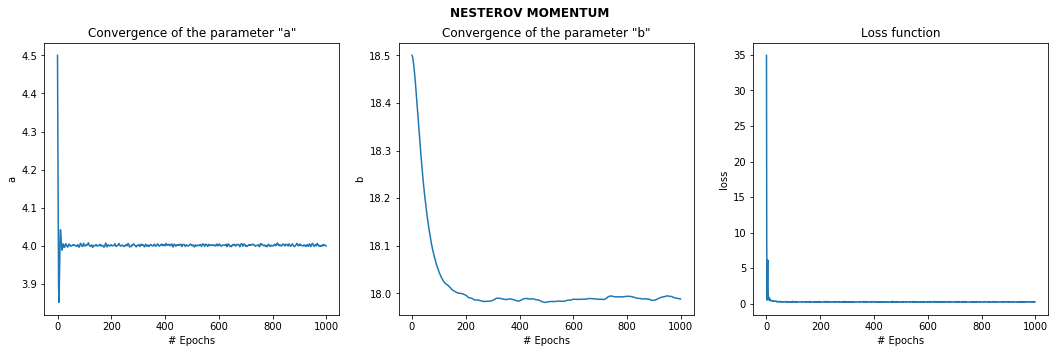

In [159]:
%%time
initial_a = 4.5
initial_b = 18.5
num_epochs = 1000
learning_rate = 1e-3
batch_size = 200 
beta = 0.9

abvalue_store, loss_store = init_data_store(num_epochs)
parameter_vector = np.array([initial_a, initial_b])
velocity = np.array([0, 0])

for i in range(num_epochs):
    abvalue_store[i,:] = parameter_vector
    
    #gradient computation
    x_batch, y_batch = extract_random_batch(x,y,batch_size)
    future_parameter_vector = parameter_vector + beta * velocity
    grad, loss = gradient(x_batch, y_batch, future_parameter_vector)
    
    #update step
    velocity = beta * velocity - learning_rate * grad
    parameter_vector = parameter_vector + velocity

    #store the loss function values to plot
    loss_store[i] = loss
    
plot_results(abvalue_store, loss_store, "NESTEROV MOMENTUM")

## AdaGrad

CPU times: user 401 ms, sys: 0 ns, total: 401 ms
Wall time: 403 ms


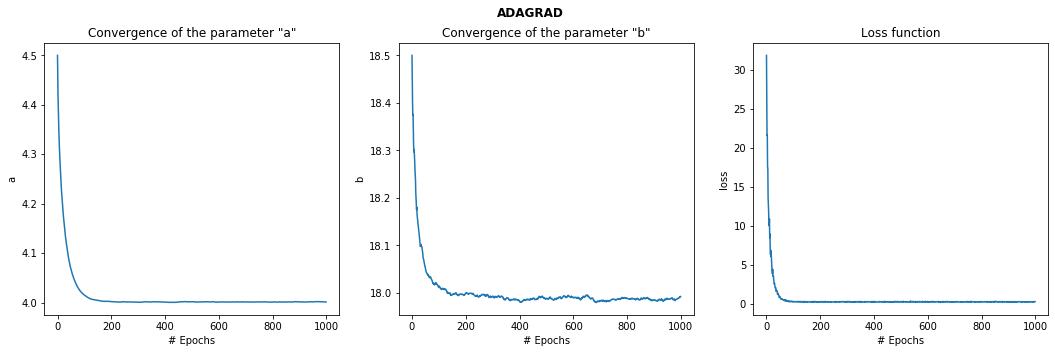

In [160]:
%%time
initial_a = 4.5
initial_b = 18.5
num_epochs = 1000
learning_rate = 0.05 # try higher values
batch_size = 200 
gamma = 1e-7

abvalue_store, loss_store = init_data_store(num_epochs)
parameter_vector = np.array([initial_a, initial_b])
grad_store = np.zeros([num_epochs, 2], dtype=float)


for i in range(num_epochs):
    abvalue_store[i,:] = parameter_vector
    
    #gradient computation
    x_batch, y_batch = extract_random_batch(x,y,batch_size)
    grad, loss = gradient(x_batch,y_batch, parameter_vector)
    grad_store[i] = grad
    
    #update step
    accumulated_squared_gradient = np.sum(np.square(grad_store), axis=0)
    update = - ((learning_rate * grad) / (gamma + np.sqrt(accumulated_squared_gradient)))
    parameter_vector = parameter_vector + update

    #store the loss function values to plot
    loss_store[i] = loss
    

plot_results(abvalue_store, loss_store, "ADAGRAD")

## RMSProp

CPU times: user 360 ms, sys: 0 ns, total: 360 ms
Wall time: 359 ms


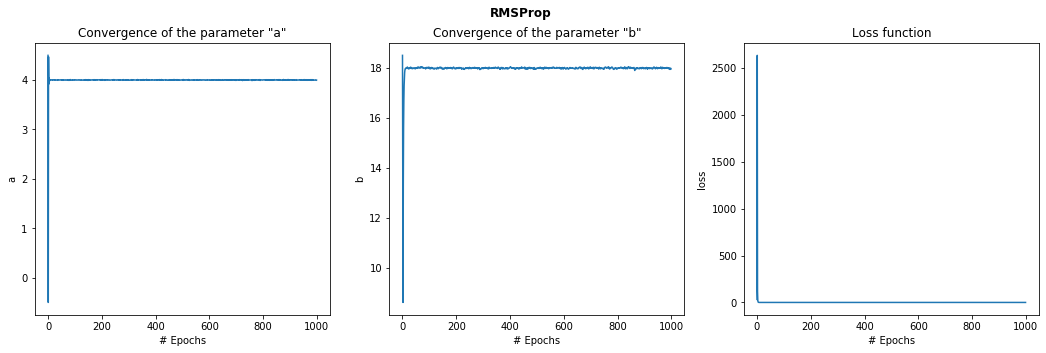

In [170]:
%%time
initial_a = 4.5
initial_b = 18.5
num_epochs = 1000
learning_rate = 0.05 # try higher values
batch_size = 200 
delta = 1e-6
rho = 0.9999

abvalue_store, loss_store = init_data_store(num_epochs)
parameter_vector = np.array([initial_a, initial_b])
grad_store = np.zeros([num_epochs, 2], dtype=float)
accumulated_squared_gradient = np.array([0,0])


for i in range(num_epochs):
    abvalue_store[i,:] = parameter_vector
    
    #gradient computation
    x_batch, y_batch = extract_random_batch(x,y,batch_size)
    grad, loss = gradient(x_batch,y_batch, parameter_vector)
    grad_store[i] = grad
    
    #update step
    accumulated_squared_gradient = rho * accumulated_squared_gradient + (1 - rho) * np.square(grad)
    update = -(learning_rate/np.sqrt(delta + accumulated_squared_gradient)) * grad
    parameter_vector = parameter_vector + update

    #store the loss function values to plot
    loss_store[i] = loss
    

plot_results(abvalue_store, loss_store, "RMSProp")

## Adam

CPU times: user 381 ms, sys: 0 ns, total: 381 ms
Wall time: 380 ms


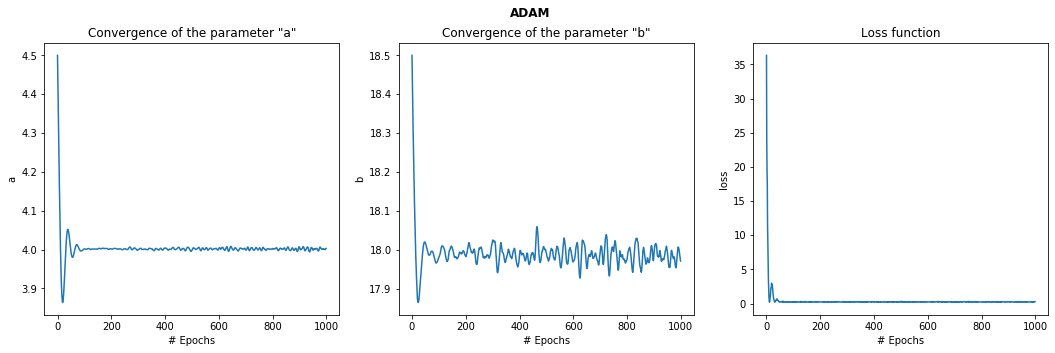

In [178]:
%%time
initial_a = 4.5
initial_b = 18.5
num_epochs = 1000
learning_rate = 0.05 # try higher values
batch_size = 200 
delta = 1e-8
rho1 = 0.9
rho2 = 0.999


abvalue_store, loss_store = init_data_store(num_epochs)
parameter_vector = np.array([initial_a, initial_b])
update_biased_first_moment_estimate = np.array([0, 0])
update_biased_second_moment_estimate = np.array([0, 0])


for i in range(num_epochs):
    abvalue_store[i,:] = parameter_vector
    
    #gradient computation
    x_batch, y_batch = extract_random_batch(x,y,batch_size)
    grad, loss = gradient(x_batch,y_batch, parameter_vector)

    # approximate first and second moment
    update_biased_first_moment_estimate = rho1 * update_biased_first_moment_estimate + (1 - rho1) * grad
    update_biased_second_moment_estimate = rho2 * update_biased_second_moment_estimate + (1 - rho2) * np.square(grad)
    
    # bias corrected moment estimates
    correct_bias_first_moment = update_biased_first_moment_estimate / (1 - rho1 ** (i+1) )
    correct_bias_second_moment = update_biased_second_moment_estimate / (1 - rho2 ** (i+1) )
    
    # update step
    update = -1 * learning_rate * (correct_bias_first_moment/(np.sqrt(correct_bias_second_moment) + delta))
    parameter_vector = parameter_vector + update

    #store the loss function values to plot
    loss_store[i] = loss
    

plot_results(abvalue_store, loss_store, "ADAM")